# Analise de Crédito 

## Descrição do Problema

**Analise exploratoria para descobrir o motivo do cliente em questão ser adimplente ou inadimplente.**

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Carregamento dos Dados

In [2]:
URL = 'https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv'

In [3]:
df = pd.read_csv(URL, na_values='na', delimiter=',')
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


## Exploração do Dataset

In [4]:
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [5]:
# considerando default como a variavel dependente do problema:
print(f"shape do dataset: {df.shape}")
print(f"adimplentes: {df[df['default'] == 0].shape}")
print(f"inadimplentes: {df[df['default'] == 1].shape}")

shape do dataset: (10127, 16)
adimplentes: (8500, 16)
inadimplentes: (1627, 16)


In [6]:
qnt_total = df.shape[0]
qnt_adim = df[df['default'] == 0].shape[0]
qnt_ina = df[df['default'] == 1].shape[0]

In [7]:
print(f" % de adimplentes: {round(100*(qnt_adim / qnt_total) ,2)}")
print(f" % de inadimplentes: {round(100*(qnt_ina / qnt_total) ,2)}")

 % de adimplentes: 83.93
 % de inadimplentes: 16.07


In [8]:
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [9]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [10]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

## Limpeza e transformação

### Tratando numeros no formato BR

In [11]:
# colunas numericas do tipo float agora são de fato float
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

### Tratando valores nulos

In [12]:
# Para os dois grupos de default(adimplente (0) ou inadimplente (1))
# é preenchido com o valor da moda, ou seja, o mais frequente do determinado grupo

for i in (0,1):
    for coluna in ('escolaridade', 'estado_civil', 'salario_anual'):
        df[coluna] = df[coluna].fillna(df[df['default'] == i][coluna].describe().top)

In [13]:
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

## Visualização

### Categoricas

In [14]:
sns.set_theme(style="darkgrid")
cor = sns.color_palette("Set2")

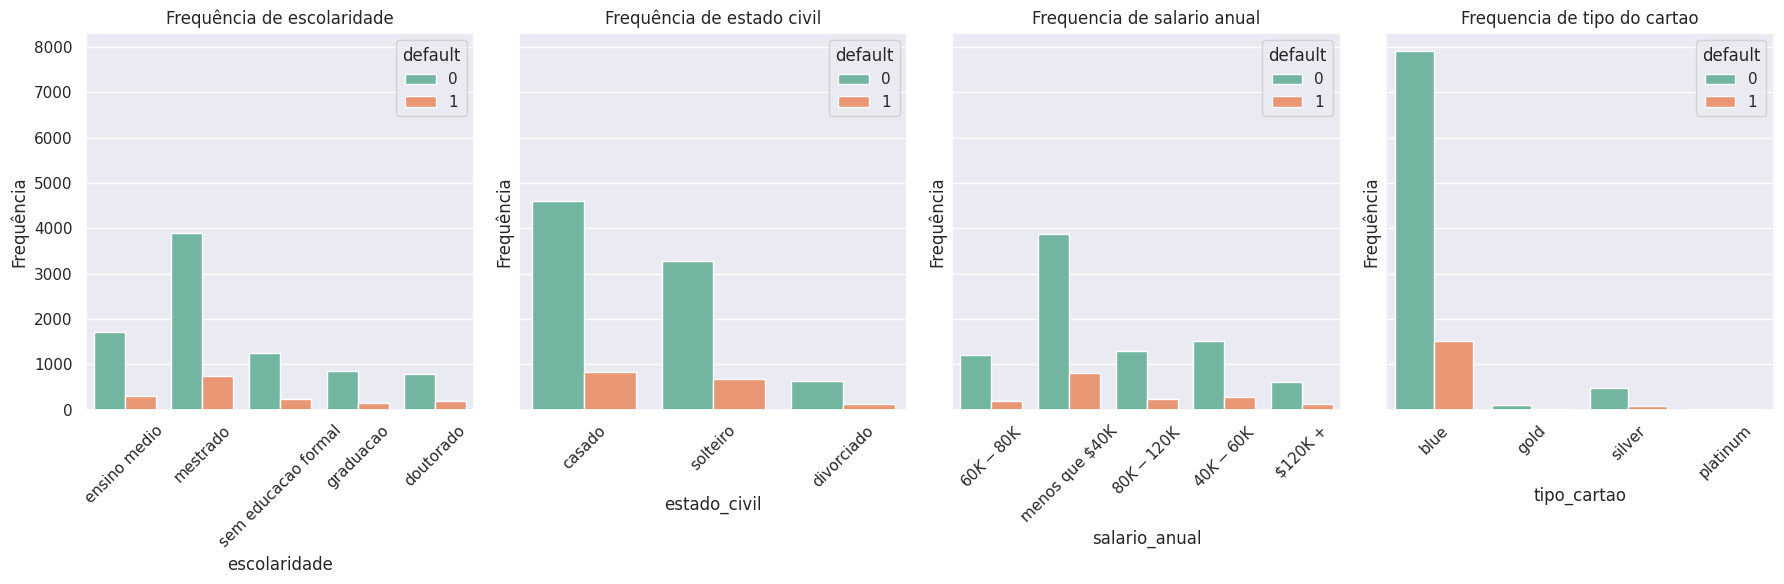

In [15]:
fig, axes = plt.subplots(1, 4, figsize=(18, 6), sharey=True)


colunas_categoricas = ['escolaridade', 'estado_civil', 'salario_anual','tipo_cartao']
titulos_categoricos = ['Frequência de escolaridade', 'Frequência de estado civil','Frequencia de salario anual','Frequencia de tipo do cartao']

# Iterar pelas colunas e criar um countplot para cada uma
for ax, coluna, titulo in zip(axes, colunas_categoricas, titulos_categoricos):
    sns.countplot(x=coluna, data=df, hue='default', ax=ax, palette=cor)
    ax.set_title(titulo)
    ax.set_ylabel('Frequência')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    
# Ajustar o layout
plt.tight_layout()
plt.show()

In [16]:
# % de inadimplentes por escolaridade, estado civil e salario anual
resultados = {}

for coluna in colunas_categoricas:
    agrupado_0 = df[df['default'] == 0].groupby(coluna).count()['default']
    agrupado_1 = df[df['default'] == 1].groupby(coluna).count()['default']
    proporcao = 100*round(agrupado_1 / (agrupado_1 + agrupado_0 ),2)
    
    resultado = pd.DataFrame({
        '% de inadimplentes' : proporcao
    })
    resultados[coluna] = resultado


In [17]:
resultados['escolaridade']

,% de inadimplentes
escolaridade,
doutorado,19.0
ensino medio,15.0
graduacao,15.0
mestrado,16.0
sem educacao formal,16.0


In [18]:
resultados['estado_civil']

,% de inadimplentes
estado_civil,
casado,15.0
divorciado,16.0
solteiro,17.0


In [19]:
resultados['salario_anual']

,% de inadimplentes
salario_anual,
$120K +,17.0
$40K - $60K,15.0
$60K - $80K,13.0
$80K - $120K,16.0
menos que $40K,17.0


In [20]:
resultados['tipo_cartao']

,% de inadimplentes
tipo_cartao,
blue,16.0
gold,18.0
platinum,25.0
silver,15.0


### Numericas

In [21]:
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

[]

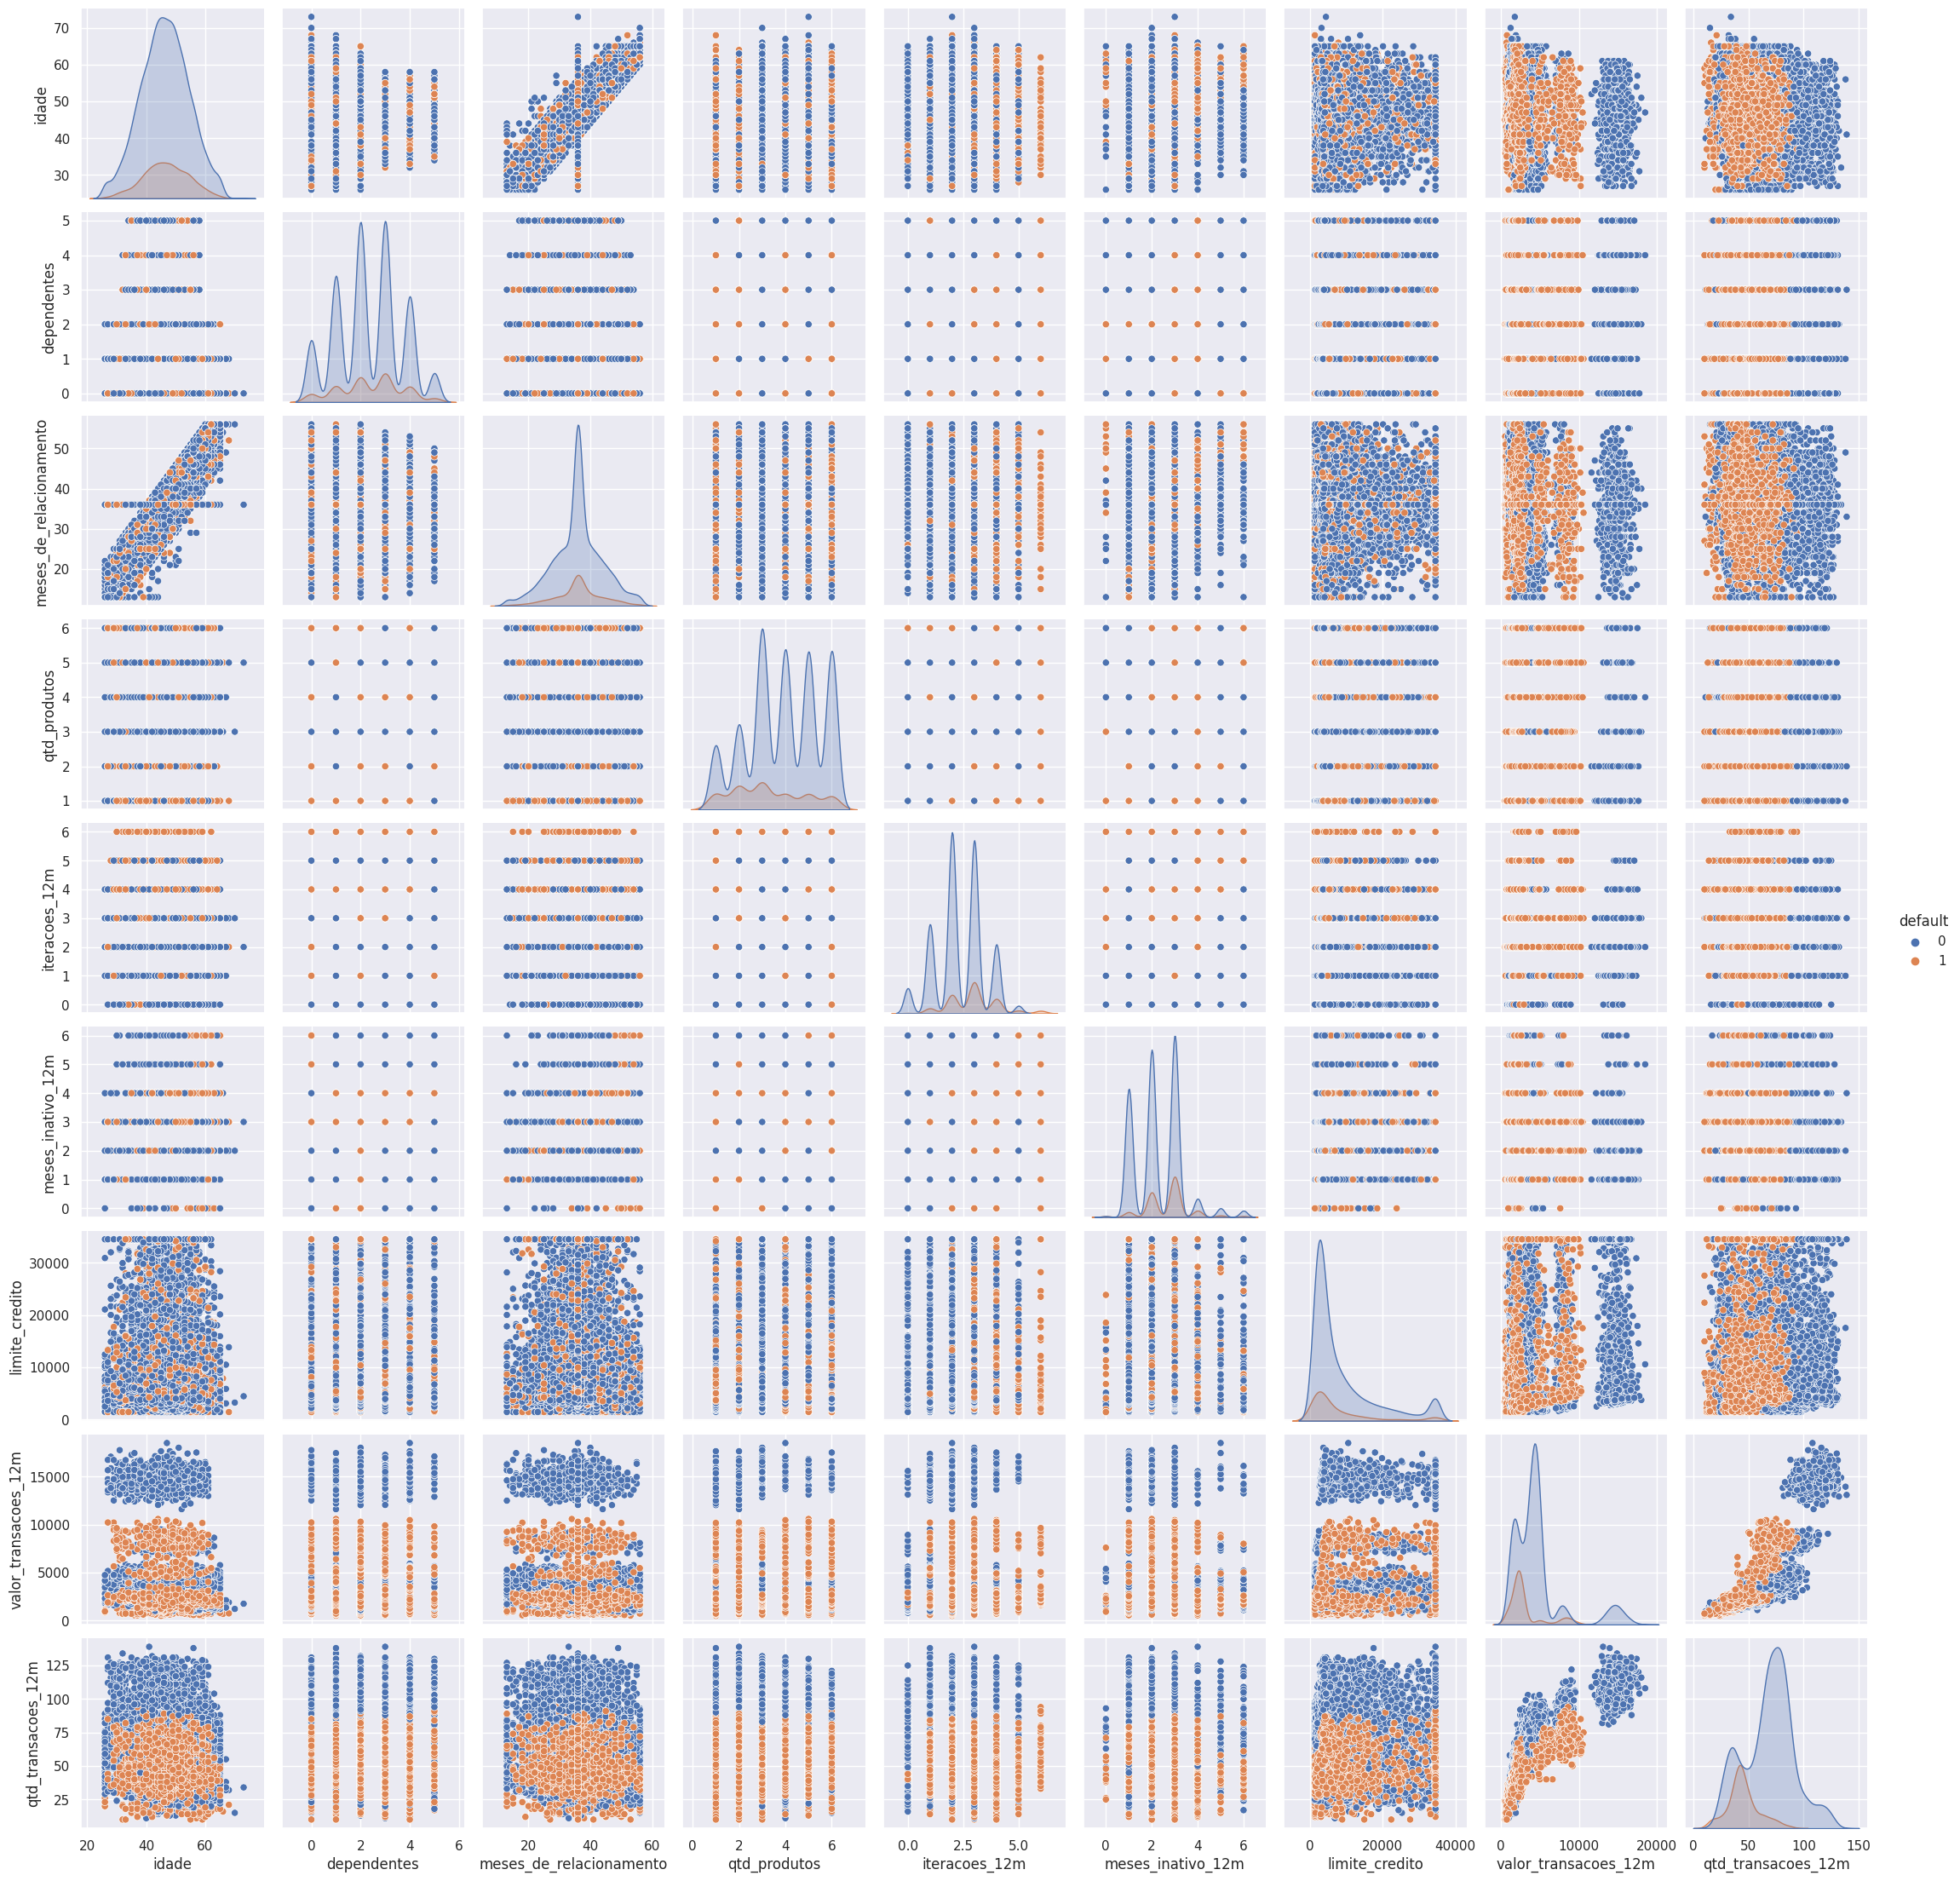

In [22]:
# grafico de pares para identificação de correlação direta entre colunas
sns.pairplot(df.drop('id', axis=1).select_dtypes('number'), hue='default')
plt.plot()

/tmp/ipykernel_18/1631794750.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(


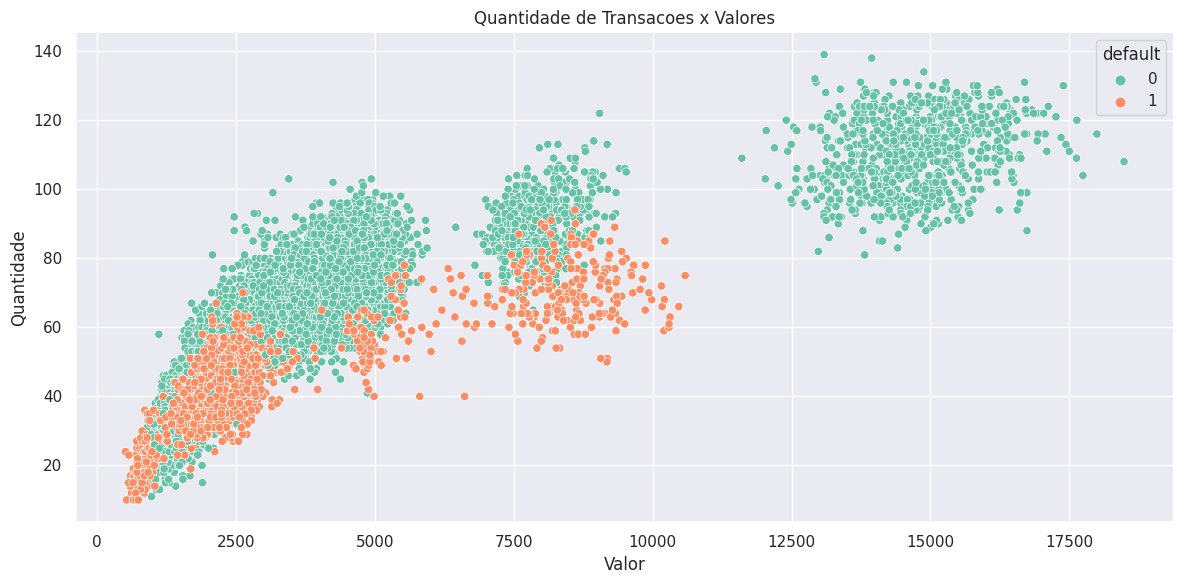

In [23]:
#grafico de pontos da quantidade x valor gasto em transacao
fig, axes = plt.subplots(figsize=(12, 6))

sns.scatterplot(
    data=df, 
    x='valor_transacoes_12m', 
    y='qtd_transacoes_12m', 
    hue='default', 
    ax=axes,
    palette=cor)
axes.set_title("Quantidade de Transacoes x Valores")
axes.set_ylabel('Quantidade')
axes.set_xlabel('Valor')


plt.tight_layout()
plt.show()

In [24]:
# nova coluna com o valor total de cada cliente
df['valor_total'] = df['valor_transacoes_12m'] * df['qtd_transacoes_12m']

/tmp/ipykernel_18/3838631395.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.histplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = gro

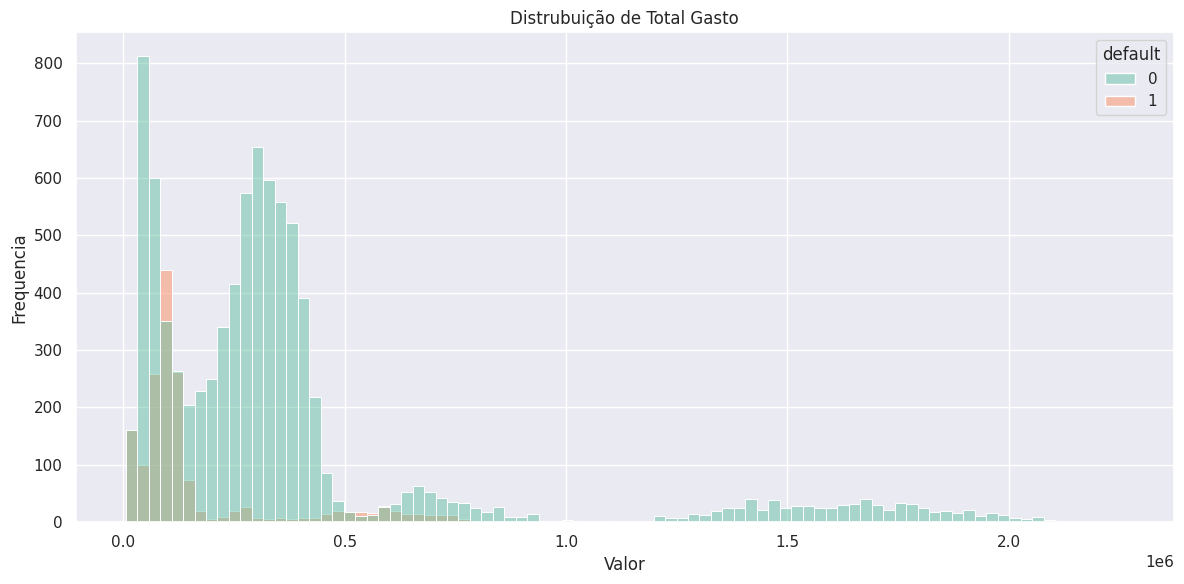

In [25]:
# distribuicao da coluna total_gasto 
fig, axes = plt.subplots(figsize=(12, 6))

sns.histplot(
    data=df, 
    x='valor_total', 
    hue='default', 
    ax=axes,
    palette=cor)
axes.set_title("Distrubuição de Total Gasto")
axes.set_ylabel('Frequencia')
axes.set_xlabel('Valor')


plt.tight_layout()
plt.show()


/tmp/ipykernel_18/1239042057.py:4: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.lineplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/pyth

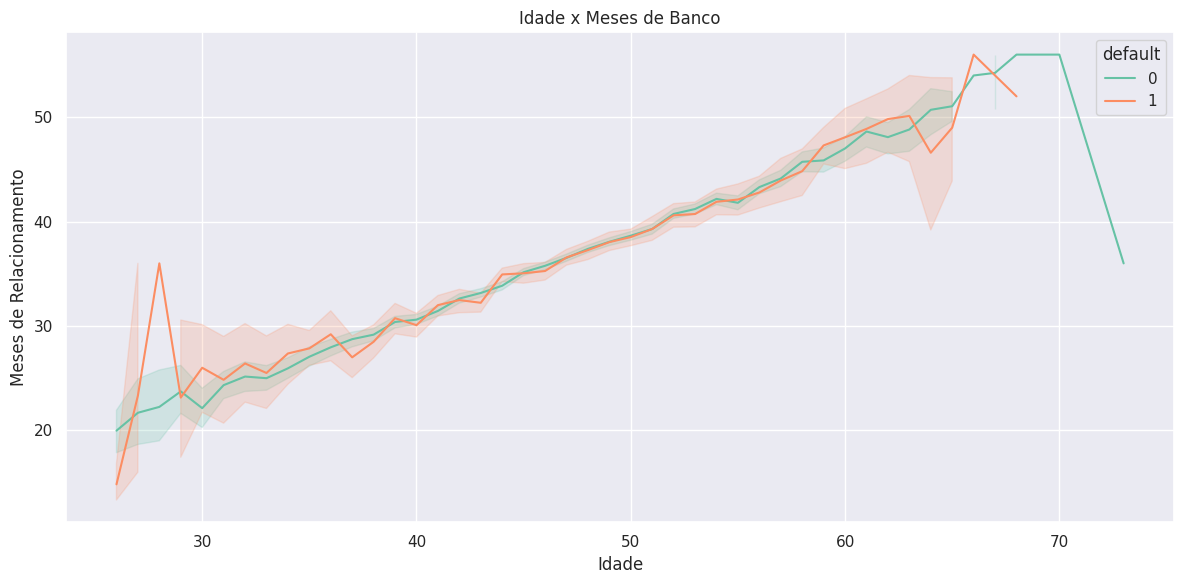

In [26]:
# curiosidade: idade x meses de banco
fig, axes = plt.subplots(figsize=(12, 6))

sns.lineplot(
    data=df, 
    x = 'idade',
    y = 'meses_de_relacionamento',
    hue = 'default',
    palette=cor)
axes.set_title("Idade x Meses de Banco")
axes.set_ylabel('Meses de Relacionamento')
axes.set_xlabel('Idade')


plt.tight_layout()
plt.show()


## **Teste de Normalidade**

In [27]:
df0 = df[df['default'] == 0]
df1 = df[df['default'] == 1]

In [28]:
from scipy.stats import shapiro

for df in (df0,df1):
    stat, p = shapiro(df['idade'])

    # Exibir os resultados
    print('Estatística=%.3f, p=%.3f' % (stat, p))

    # Interpretar o valor p
    alpha = 0.05
    if p > alpha:
        print('A amostra parece normal (não rejeitar H0)')
    else:
        print('A amostra não parece normal (rejeitar H0)')

Estatística=0.996, p=0.000
A amostra não parece normal (rejeitar H0)
Estatística=0.996, p=0.000
A amostra não parece normal (rejeitar H0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


**Como a amostra não segue a distruição normal, não sera aplicado nenhum teste de hipotese e será considerado que a amostra do dataframe compoem a população inteira de clientes do banco**

## Insights

In [29]:
df0_100 = df0[df0['qtd_transacoes_12m'] > 100]['qtd_transacoes_12m']
df1_100 = df1[df1['qtd_transacoes_12m'] > 100]['qtd_transacoes_12m']
print(f"Quantidade de clientes adimplentes com > 100 transações: {df0_100.count()}")
print(f"Quantidade de clientes adimplentes com >100 transações: {df1_100.count()}")

Quantidade de clientes adimplentes com > 100 transações: 649
Quantidade de clientes adimplentes com >100 transações: 0


In [30]:
df0_100v = df0[df0['valor_transacoes_12m'] > 10000]['valor_transacoes_12m']
df1_100v = df1[df1['valor_transacoes_12m'] > 10000]['valor_transacoes_12m']
print(f"Quantidade de clientes adimplentes com transacoes > 10 000R$: {df0_100v.count()}")
print(f"Quantidade de clientes inadimplentes com transacoes > 10 000R$: {df1_100v.count()}")

Quantidade de clientes adimplentes com transacoes > 10 000R$: 747
Quantidade de clientes inadimplentes com transacoes > 10 000R$: 10


In [31]:
med0 = round(df0['valor_total'].median(),2)
med1 = round(df1['valor_total'].median(),2)
print(f"Mediana de gasto total adimplentes em 1 ano: {med0}R$\nMediana de gasto inadimplentes em 1 ano: {med1}R$")
print(f"Inadimplentes possuem um gasto mediano {round((med1 / med0),2)*100}% menor do que um adimplente")

Mediana de gasto total adimplentes em 1 ano: 292407.2R$
Mediana de gasto inadimplentes em 1 ano: 100491.69R$
Inadimplentes possuem um gasto mediano 34.0% menor do que um adimplente


*  Adimplentes tendem a efetuar mais transações no ano
*  Adimplentes tendem a efetuar transações com quantias maiores no ano
* ### **Inadimplentes tendem a gastar muito menos do que adimplentes**
* Independentemente de serem adimplente ou inadimplentes, a curva de meses de relacionamento x idade segue linear, mostrando a eficacia do banco em manter seus usuarios

